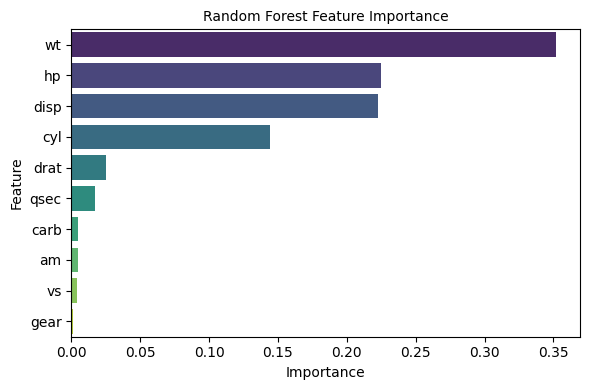

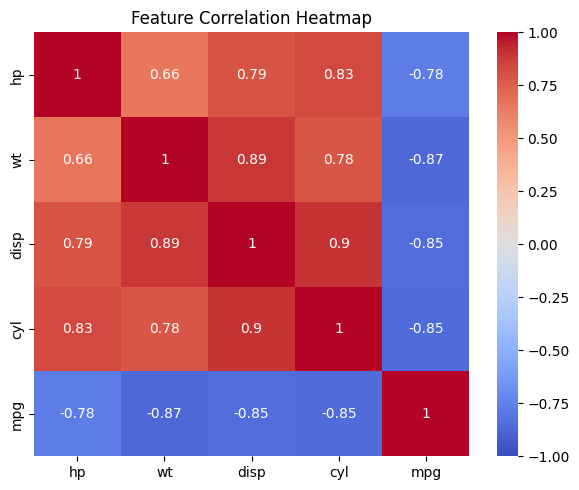

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pointbiserialr

# -------------------------------
# Load and Prepare Data
# -------------------------------
df = pd.read_csv("mtcars_original.csv")

target = 'mpg'
features = df.select_dtypes(include=['number']).columns.drop(target).tolist()

df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]
# -------------------------------
# Correlation Analysis (pointbiserialr)
# -------------------------------
'''print("=== Feature Correlation with Target (MPG) ===")
for col in X.columns:
    corr, pval = pointbiserialr(X[col], y)
    print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.3f}")

print("\nHigh correlations (|r| > 0.02):")
for col in X.columns:
    corr, pval = pointbiserialr(X[col], y)
    if abs(corr) > 0.02:
        print(f"{col}: correlation = {corr:.3f}, p-value = {pval:.3f}")'''

# -------------------------------
# Train Random Forest Regressor
# -------------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# -------------------------------
# Feature Importance (Random Forest)
# -------------------------------
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



# Bar plot of feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")

plt.title("Random Forest Feature Importance", fontsize=10)  # Increase title font
plt.xlabel("Importance", fontsize=10)  # Increase x-axis label font
plt.ylabel("Feature", fontsize=10)     # Increase y-axis label font

#plt.xticks(fontsize=12)  # Optional: increase tick label font
#plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

# -------------------------------
# Pearson Correlation Heatmap
# -------------------------------
features = ['hp', 'wt', 'disp', 'cyl'] 
plt.figure(figsize=(6, 5))
corr_matrix = df[features + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.tight_layout()
plt.show()



